NPTEL - Quantum Mechanics and Applications

Ajoy Ghatak

IIT Delhi

# Dirac Delta Function

In [1]:
import sympy as sp
import numpy as np
import scipy.constants as const
from scipy.integrate import quad
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Function R(x)
$$ R_{\sigma}(x) = \frac{1}{2\sigma} \quad; \quad a-\sigma<x<a+\sigma $$
$$ = 0 \quad ; \quad otherwise $$

In [2]:
def R_sigma(sigma, a, x):
    if a-sigma<x<a+sigma:
        return 1/(2*sigma)
    else:
        return 0

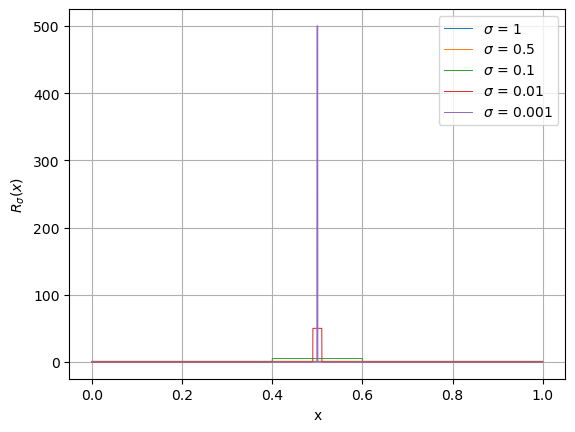

In [3]:
x = np.linspace(0, 1, 10000)
a = 0.5
sigmas = [1,0.5,1e-1,1e-2,1e-3]

for sigma in sigmas:
    R_sigma1 = [R_sigma(sigma, a, i) for i in x]
    plt.plot(x, np.array(R_sigma1), label=f'$\sigma$ = {sigma}', lw=0.7)
plt.legend()
plt.xlabel('x')
plt.ylabel(r'$R_{\sigma}(x)$')
plt.grid()
plt.show()

In [4]:
x1 = list(x)
x2 = x1*np.array(sigmas).size
x2 = np.array(x2)
sigmas1 = sigmas*x.size
sigmas2 = np.array(sigmas1)
sigmas2 = sigmas2.reshape(x.size, np.array(sigmas).size).T
sigmas2 = sigmas2.reshape(x.size*np.array(sigmas).size)

In [5]:
R_sigma2 = []
for sigma in sigmas:
    for i in x:
        rs2 = R_sigma(sigma, a, i)
        R_sigma2.append(rs2)
R_sigma2 = np.array(R_sigma2)

In [6]:
print(x2.shape, sigmas2.shape, R_sigma2.shape)

(50000,) (50000,) (50000,)


In [7]:
fig = px.line(x=x2, y=R_sigma2, color=sigmas2, title='R_sigma(x)',
                labels=dict(x='x',y='R_sigma(x)',color='sigma'))
fig.show()

## Function T(x)

$$ T_{\sigma}(x) = 1 \quad; \quad x>a+\sigma $$
$$ = \frac{1}{2\sigma}(x-(a-\sigma)) \,; \, a-\sigma<x<a+\sigma $$
$$ = 0 \quad ; \quad otherwise $$

Also;
$$ \frac{dT_{\sigma}}{dx} = R_{\sigma}(x) $$


In [8]:
def T_sigma(sigma, a, x):
    if x>a+sigma:
        return 1
    elif a-sigma<=x<=a+sigma:
        return 1/(2*sigma) * (x-(a-sigma))
    else:
        return 0

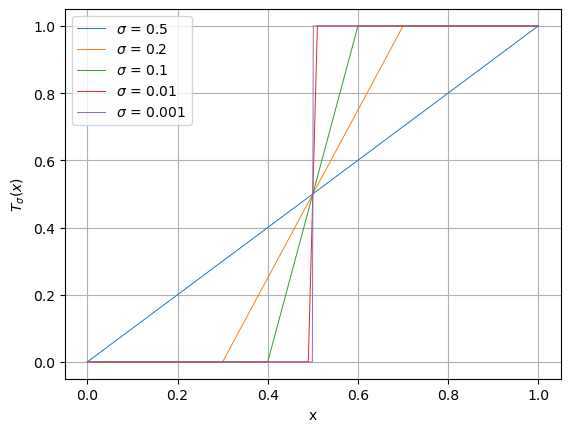

In [9]:
x = np.linspace(0, 1, 10000)
a = 0.5
sigmas = [0.5,0.2,1e-1,1e-2,1e-3]

for sigma in sigmas:
    T_sigma1 = [T_sigma(sigma, a, i) for i in x]
    T_sigma1 = np.array(T_sigma1)
    plt.plot(x, T_sigma1, label=f'$\sigma$ = {sigma}', lw=0.7)
plt.legend()
plt.xlabel('x')
plt.ylabel(r'$T_{\sigma}(x)$')
plt.grid()
plt.show()

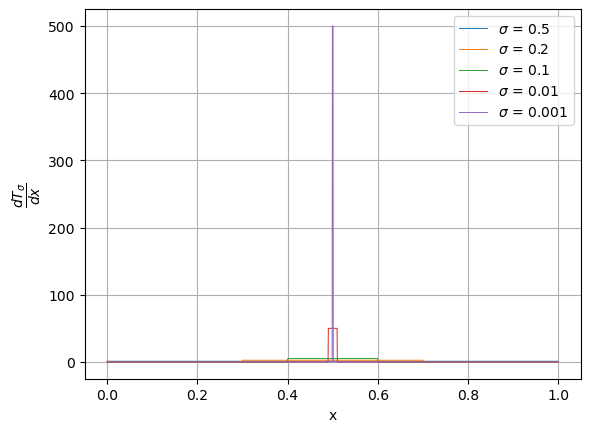

In [10]:
x = np.linspace(0, 1, 10000)
a = 0.5
sigmas = [0.5,0.2,1e-1,1e-2,1e-3]

for sigma in sigmas:
    T_sigma1 = [T_sigma(sigma, a, i) for i in x]
    T_sigma1 = np.array(T_sigma1)
    T_sigmap1 = np.gradient(T_sigma1, x)
    plt.plot(x, T_sigmap1, label=f'$\sigma$ = {sigma}', lw=0.7)
plt.legend()
plt.xlabel('x')
plt.ylabel(r'$\dfrac{dT_{\sigma}}{dx}$')
plt.grid()
plt.show()

In [11]:
x1 = list(x)
x2 = x1*np.array(sigmas).size
x2 = np.array(x2)
sigmas1 = sigmas*x.size
sigmas2 = np.array(sigmas1)
sigmas2 = sigmas2.reshape(x.size, np.array(sigmas).size).T
sigmas2 = sigmas2.reshape(x.size*np.array(sigmas).size)

In [12]:
T_sigma2 = []
for sigma in sigmas:
    for i in x:
        ts2 = T_sigma(sigma, a, i)
        T_sigma2.append(ts2)
T_sigma2 = np.array(T_sigma2)

In [13]:
print(x2.shape, sigmas2.shape, T_sigma2.shape)

(50000,) (50000,) (50000,)


In [14]:
fig = px.line(x=x2, y=T_sigma2, color=sigmas2, title='T_sigma(x)',
            labels=dict(x='x',y='T_sigma(x)',color='sigma'))
fig.show()

In [15]:
T_sigmap2 = np.gradient(T_sigma2, x2)

fig = px.line(x=x2, y=T_sigmap2, color=sigmas2, title='dT_sigma/dx',
            labels=dict(x='x',y='dT_sigma/dx',color='sigma'))
fig.show()

## Gaussian Function

$$ G_{\sigma}(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right) $$

In [16]:
def G_sigma(sigma, mu, x):
    return 1/(sigma*(2*np.pi)**0.5) * np.exp(-(x-mu)**2/(2*sigma**2))

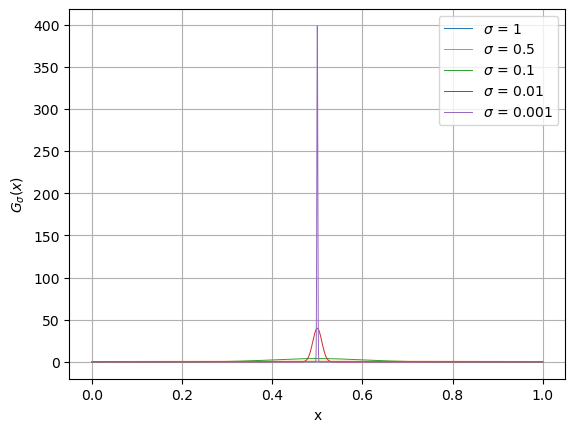

In [17]:
x = np.linspace(0, 1, 10000)
a = 0.5
sigmas = [1,0.5,1e-1,1e-2,1e-3]

for sigma in sigmas:
    G_sigma1 = [G_sigma(sigma, a, i) for i in x]
    plt.plot(x, np.array(G_sigma1), label=f'$\sigma$ = {sigma}', lw=0.7)
plt.legend()
plt.xlabel('x')
plt.ylabel(r'$G_{\sigma}(x)$')
plt.grid()
plt.show()

In [18]:
x1 = list(x)
x2 = x1*np.array(sigmas).size
x2 = np.array(x2)
sigmas1 = sigmas*x.size
sigmas2 = np.array(sigmas1)
sigmas2 = sigmas2.reshape(x.size, np.array(sigmas).size).T
sigmas2 = sigmas2.reshape(x.size*np.array(sigmas).size)

In [19]:
G_sigma2 = []
for sigma in sigmas:
    for i in x:
        gs2 = G_sigma(sigma, a, i)
        G_sigma2.append(gs2)
G_sigma2 = np.array(G_sigma2)

In [20]:
print(x2.shape, sigmas2.shape, G_sigma2.shape)

(50000,) (50000,) (50000,)


In [21]:
fig = px.line(x=x2, y=G_sigma2, color=sigmas2, title=r'G_sigma(x)',
              labels=dict(x='x',y='G_sigma(x)',color='sigma'))
fig.show()

## By Integration

In [22]:
def dirac_delta_intg(k, a, x):
    integrand = 1/(2*np.pi) * np.exp(1j*k*(x-a))
    return quad(integrand, -np.inf, np.inf)